This notebook demonstrates how to use SageMaker SDK to plot all the mAP values of two completed HPO jobs that tuned the SSD object detection algorithm.

The SSD algorithm permits only one backend per HPO job. Hence, two HPO jobs were run to completion: one with `vgg16` backend, and another with `resnet50` backend.

In this particular example, the much simpler `vgg16` backend surprisingly scores higher mAP values.

In [1]:
import sagemaker as sm

sess = sm.Session()

# Attach to existing HPO jobs
hpo_vgg16 = sm.tuner.HyperparameterTuner.attach('hpo-vgg16', sagemaker_session=sess)
hpo_resnet50 = sm.tuner.HyperparameterTuner.attach('hpo-resnet50', sagemaker_session=sess)

# We're interested only in the analytics.
#
# Quote from https://sagemaker.readthedocs.io/en/stable/tuner.html:
#     An instance of HyperparameterTuningJobAnalytics for this latest tuning job of this tuner.
#     Analytics olbject gives you access to tuning results summarized into a pandas dataframe.
analytics_vgg16 = hpo_vgg16.analytics()
analytics_resnet50 = hpo_resnet50.analytics()

See [SageMaker Analytics](https://sagemaker.readthedocs.io/en/stable/analytics.html) on detail API reference. Important methods are `dataframe()` and possibly `export_csv()`.

This notebook will want to work with the dataframes.

In [2]:
df_vgg16 = analytics_vgg16.dataframe()
df_resnet50 = analytics_resnet50.dataframe()

Display the dataframes. If an HPO job has, say 40 training jobs, than the dataframe will have 40 rows. We'll want the final objective value which contains our mAP values.

In [3]:
df_vgg16

,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,learning_rate,mini_batch_size,optimizer
0,0.996949,1481.0,2019-08-01 09:32:57+00:00,hpo-vgg16-040-d112ffae,Completed,2019-08-01 09:08:16+00:00,6.160778e-04,5.0,adam
1,0.894325,1609.0,2019-08-01 09:05:22+00:00,hpo-vgg16-039-e295f827,Completed,2019-08-01 08:38:33+00:00,8.827578e-04,4.0,adam
2,0.994909,1711.0,2019-08-01 08:32:06+00:00,hpo-vgg16-038-0f26a12f,Completed,2019-08-01 08:03:35+00:00,1.000000e-03,3.0,rmsprop
3,0.999718,1904.0,2019-08-01 08:00:07+00:00,hpo-vgg16-037-5fa021be,Completed,2019-08-01 07:28:23+00:00,8.707713e-04,2.0,rmsprop
4,0.965522,1946.0,2019-08-01 07:25:32+00:00,hpo-vgg16-036-149b7c18,Completed,2019-08-01 06:53:06+00:00,1.472494e-04,2.0,sgd
5,0.989455,1943.0,2019-08-01 06:50:26+00:00,hpo-vgg16-035-37a69cce,Completed,2019-08-01 06:18:03+00:00,3.300026e-04,2.0,rmsprop
6,0.993801,1917.0,2019-08-01 06:15:03+00:00,hpo-vgg16-034-f07a25aa,Completed,2019-08-01 05:43:06+00:00,8.661307e-04,2.0,rmsprop
7,0.868692,1618.0,2019-08-01 05:40:25+00:00,hpo-vgg16-033-362dc66d,Completed,2019-08-01 05:13:27+00:00,7.286375e-04,4.0,sgd
8,0.554022,2335.0,2019-08-01 05:10:33+00:00,hpo-vgg16-032-169a5129,Completed,2019-08-01 04:31:38+00:00,1.386004e-07,2.0,adam
9,0.970208,1719.0,2019-08-01 04:25:37+00:00,hpo-vgg16-031-c9d7751c,Completed,2019-08-01 03:56:58+00:00,4.119370e-04,3.0,rmsprop


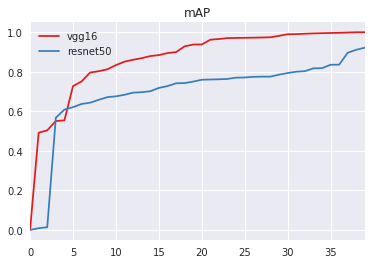

In [5]:
%matplotlib inline

import pandas as pd
import seaborn as sns
sns.set()
sns.set_palette("Set1")

mAP = pd.concat([df_vgg16['FinalObjectiveValue'].rename('vgg16').sort_values().reset_index(drop=True),
                 df_resnet50['FinalObjectiveValue'].rename('resnet50').sort_values().reset_index(drop=True)],
                axis=1)
mAP.plot(title='mAP');